In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


Using CAMB 1.0.9 installed at /Users/katherinefraser/Documents/Physics/Cosmology/CAMB-1.0.9/camb


In [2]:
#Choose self interaction values
Gnus = [0, 0.01, 0.001, 0.0001]
#Create list of power spectra
totCL = list()

In [14]:
#Loop through self-interaction values
for i in range(len(Gnus)):
    #Set up a new set of parameters for CAMB
    pars = camb.CAMBparams()
    #Set parameters to equal the standard mode in 1306.1536
    pars.set_cosmology(H0=68.1, ombh2=0.022, omch2=0.119, tau=0.09, Gnu = Gnus[i])
    pars.InitPower.set_params(As=2.19e-9, ns=0.959, r=0)
    pars.set_for_lmax(3000, lens_potential_accuracy=0);
    #calculate results for these parameters
    results = camb.get_results(pars)
    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    #calculate the power spectra
    #totCL.append(powers['total'])
    totCL.append(powers['lensed_scalar'])
    print(i, ": ", totCL[i])

0 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.12400097e+03  5.35974596e-02  1.71182336e-06  3.54571771e+00]
 ...
 [ 2.31678035e+01  7.56556292e-01  1.25473725e-02 -1.21011487e+00]
 [ 2.31144494e+01  7.54508050e-01  1.25309958e-02 -1.20346953e+00]
 [ 2.30609794e+01  7.52493123e-01  1.25146363e-02 -1.19687143e+00]]
1 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.12416378e+03  5.35987296e-02  1.93807464e-06  3.54579260e+00]
 ...
 [ 2.64301841e+01  8.69674803e-01  1.49876397e-02 -1.41693735e+00]
 [ 2.63724147e+01  8.67190832e-01  1.49680414e-02 -1.40965325e+00]
 [ 2.63144877e+01  8.64738256e-01  1.49484642e-02 -1.40239770e+00]]
2 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.12402008e+03  5.35978310e-02  

In [15]:
#Self-Interacting Neutrino Mode
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#Set parameters to equal the interacting mode in 1306.1536
pars.set_cosmology(H0=69.0, ombh2=0.0222, omch2=0.12, tau=0.09, Gnu = 0.01)
pars.InitPower.set_params(As=2.07e-9, ns=0.932)
pars.set_for_lmax(3000, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
#calculate the power spectra
totCL.append(powers['lensed_scalar'])
print(totCL[-1])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.22000483e+03  5.88461757e-02  1.73688597e-06  3.90333774e+00]
 ...
 [ 2.34856864e+01  7.67898301e-01  1.25749231e-02 -1.21043403e+00]
 [ 2.34313691e+01  7.65878670e-01  1.25581642e-02 -1.20375635e+00]
 [ 2.33769394e+01  7.63894126e-01  1.25414227e-02 -1.19713160e+00]]


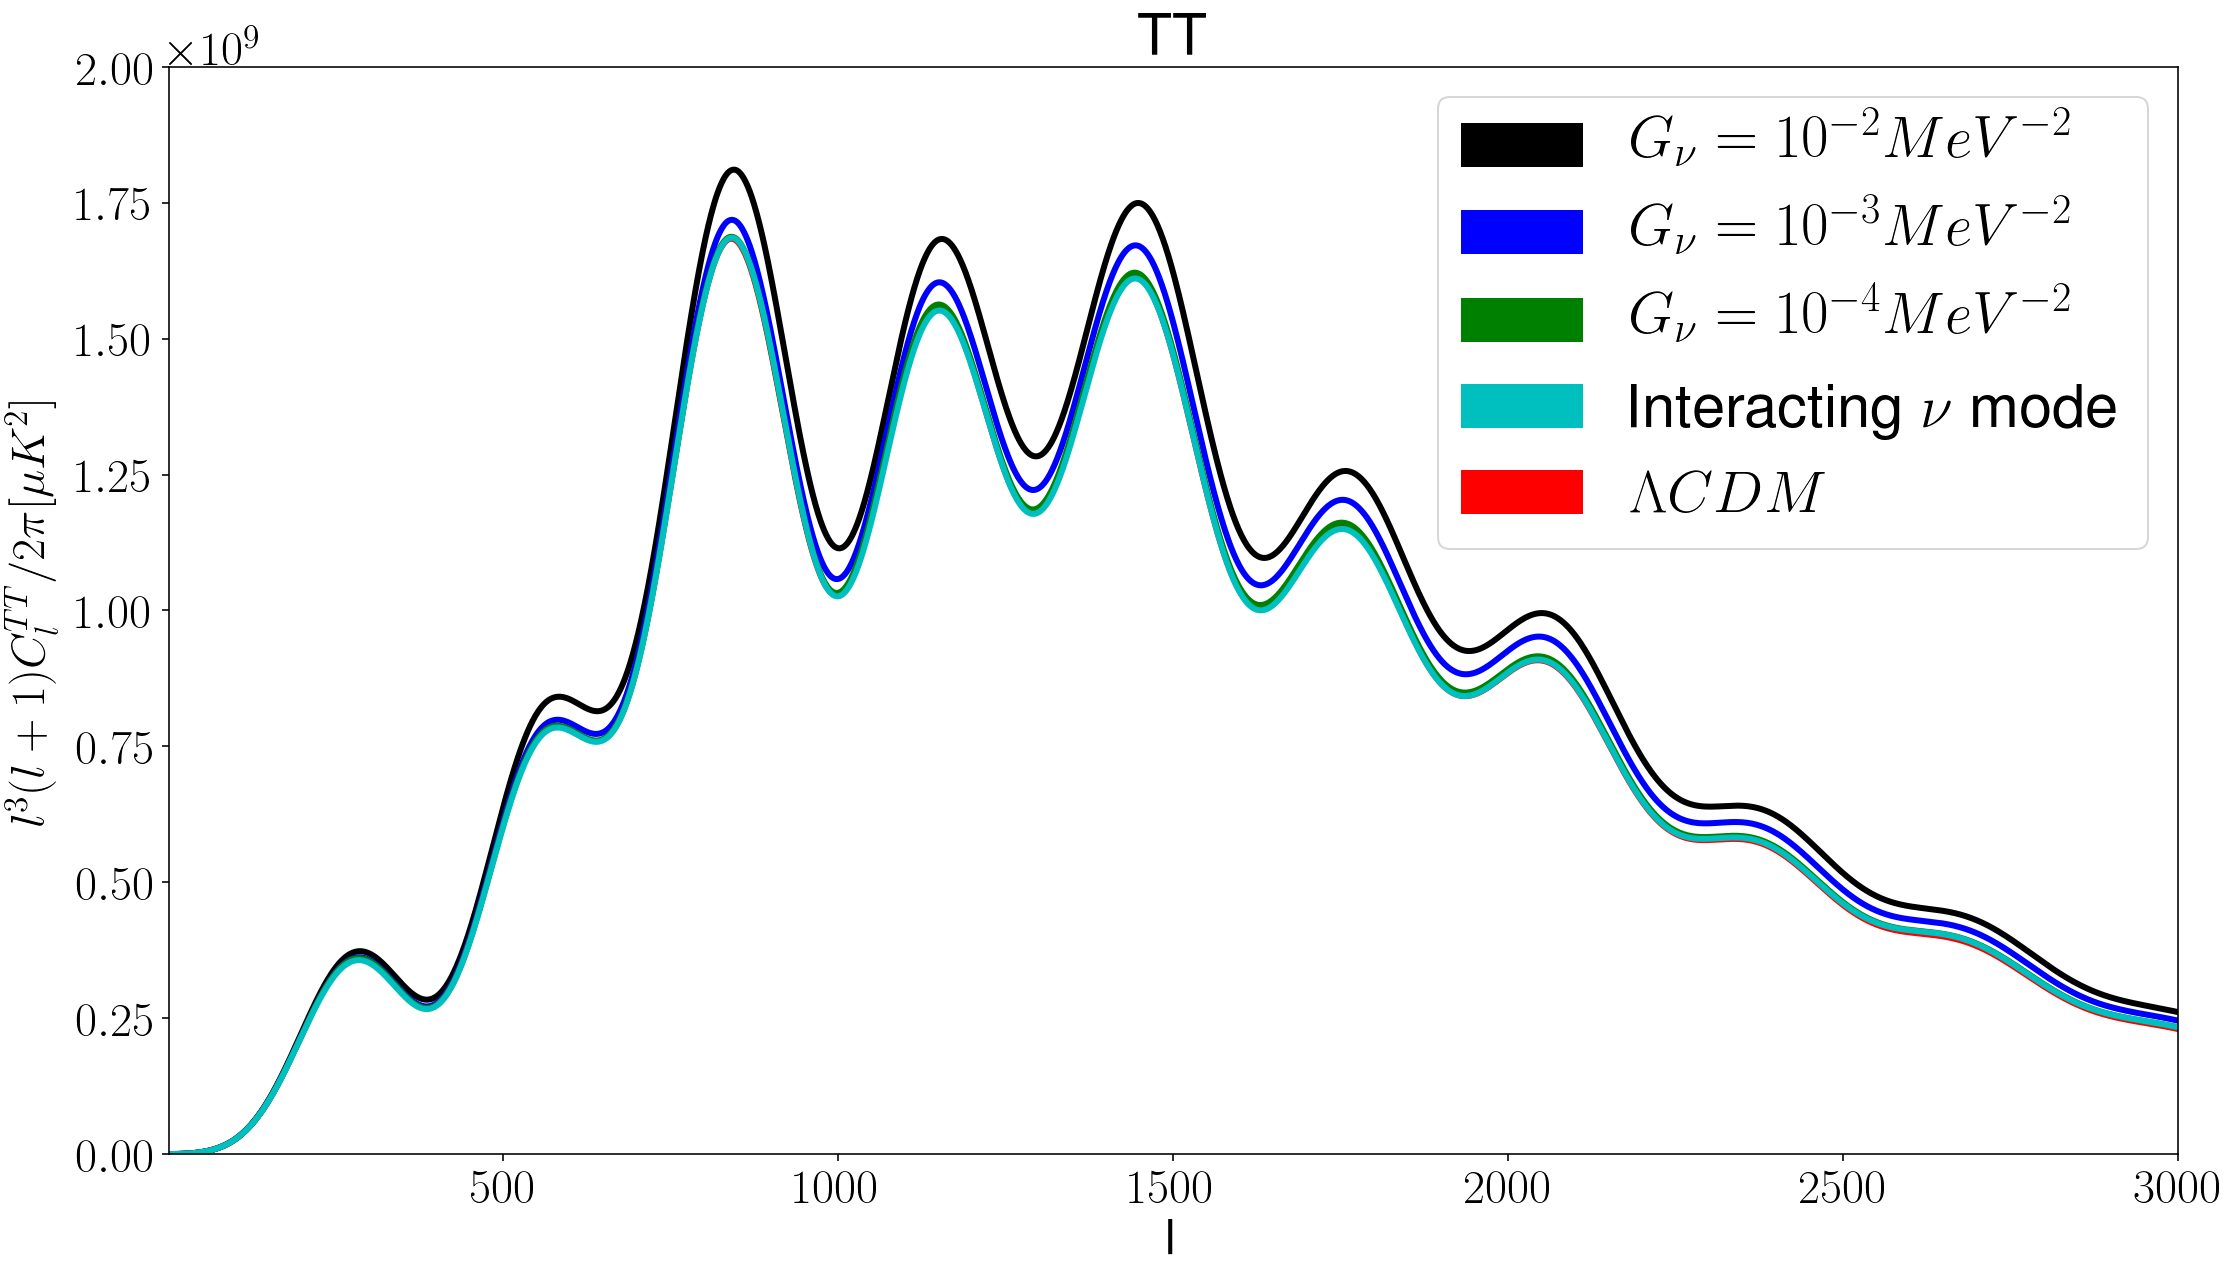

In [16]:
#plot the unlensed scalar CMB power spectra for different values of Gnu, multiplying by l^2 to compare with 1306.1536
ls = np.arange(totCL[0].shape[0])
plt.figure(figsize=(18, 10))
plt.plot(ls,ls*ls*totCL[0][:,0], color='r',linewidth=3)
plt.plot(ls,ls*ls*totCL[1][:,0], color='k',linewidth=3)
plt.plot(ls,ls*ls*totCL[2][:,0], color='b',linewidth=3)
plt.plot(ls,ls*ls*totCL[3][:,0], color='g',linewidth=3)
plt.plot(ls,ls*ls*totCL[-1][:,0], color='c',linewidth=3)
plt.title('TT');
plt.xlim([2,3000]);
plt.ylim([0e9,2e9]);
plt.xlabel("l")
plt.ylabel(r'$l^3(l + 1)C_l^{TT}/2\pi [\mu K^2]$')
font = {'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
red_patch = mpatches.Patch(color='r', label=r'$\Lambda CDM$')
black_patch = mpatches.Patch(color='k', label=r'$G_\nu = 10^{-2} MeV^{-2}$')
blue_patch = mpatches.Patch(color='b', label=r'$G_\nu = 10^{-3} MeV^{-2}$')
green_patch = mpatches.Patch(color='g', label=r'$G_\nu = 10^{-4} MeV^{-2}$')
cyan_patch = mpatches.Patch(color='c', label=r'Interacting $\nu$ mode')
plt.legend(handles=[black_patch,blue_patch,green_patch,cyan_patch,red_patch])
plt.savefig('Neutrinos_CMB.jpg')

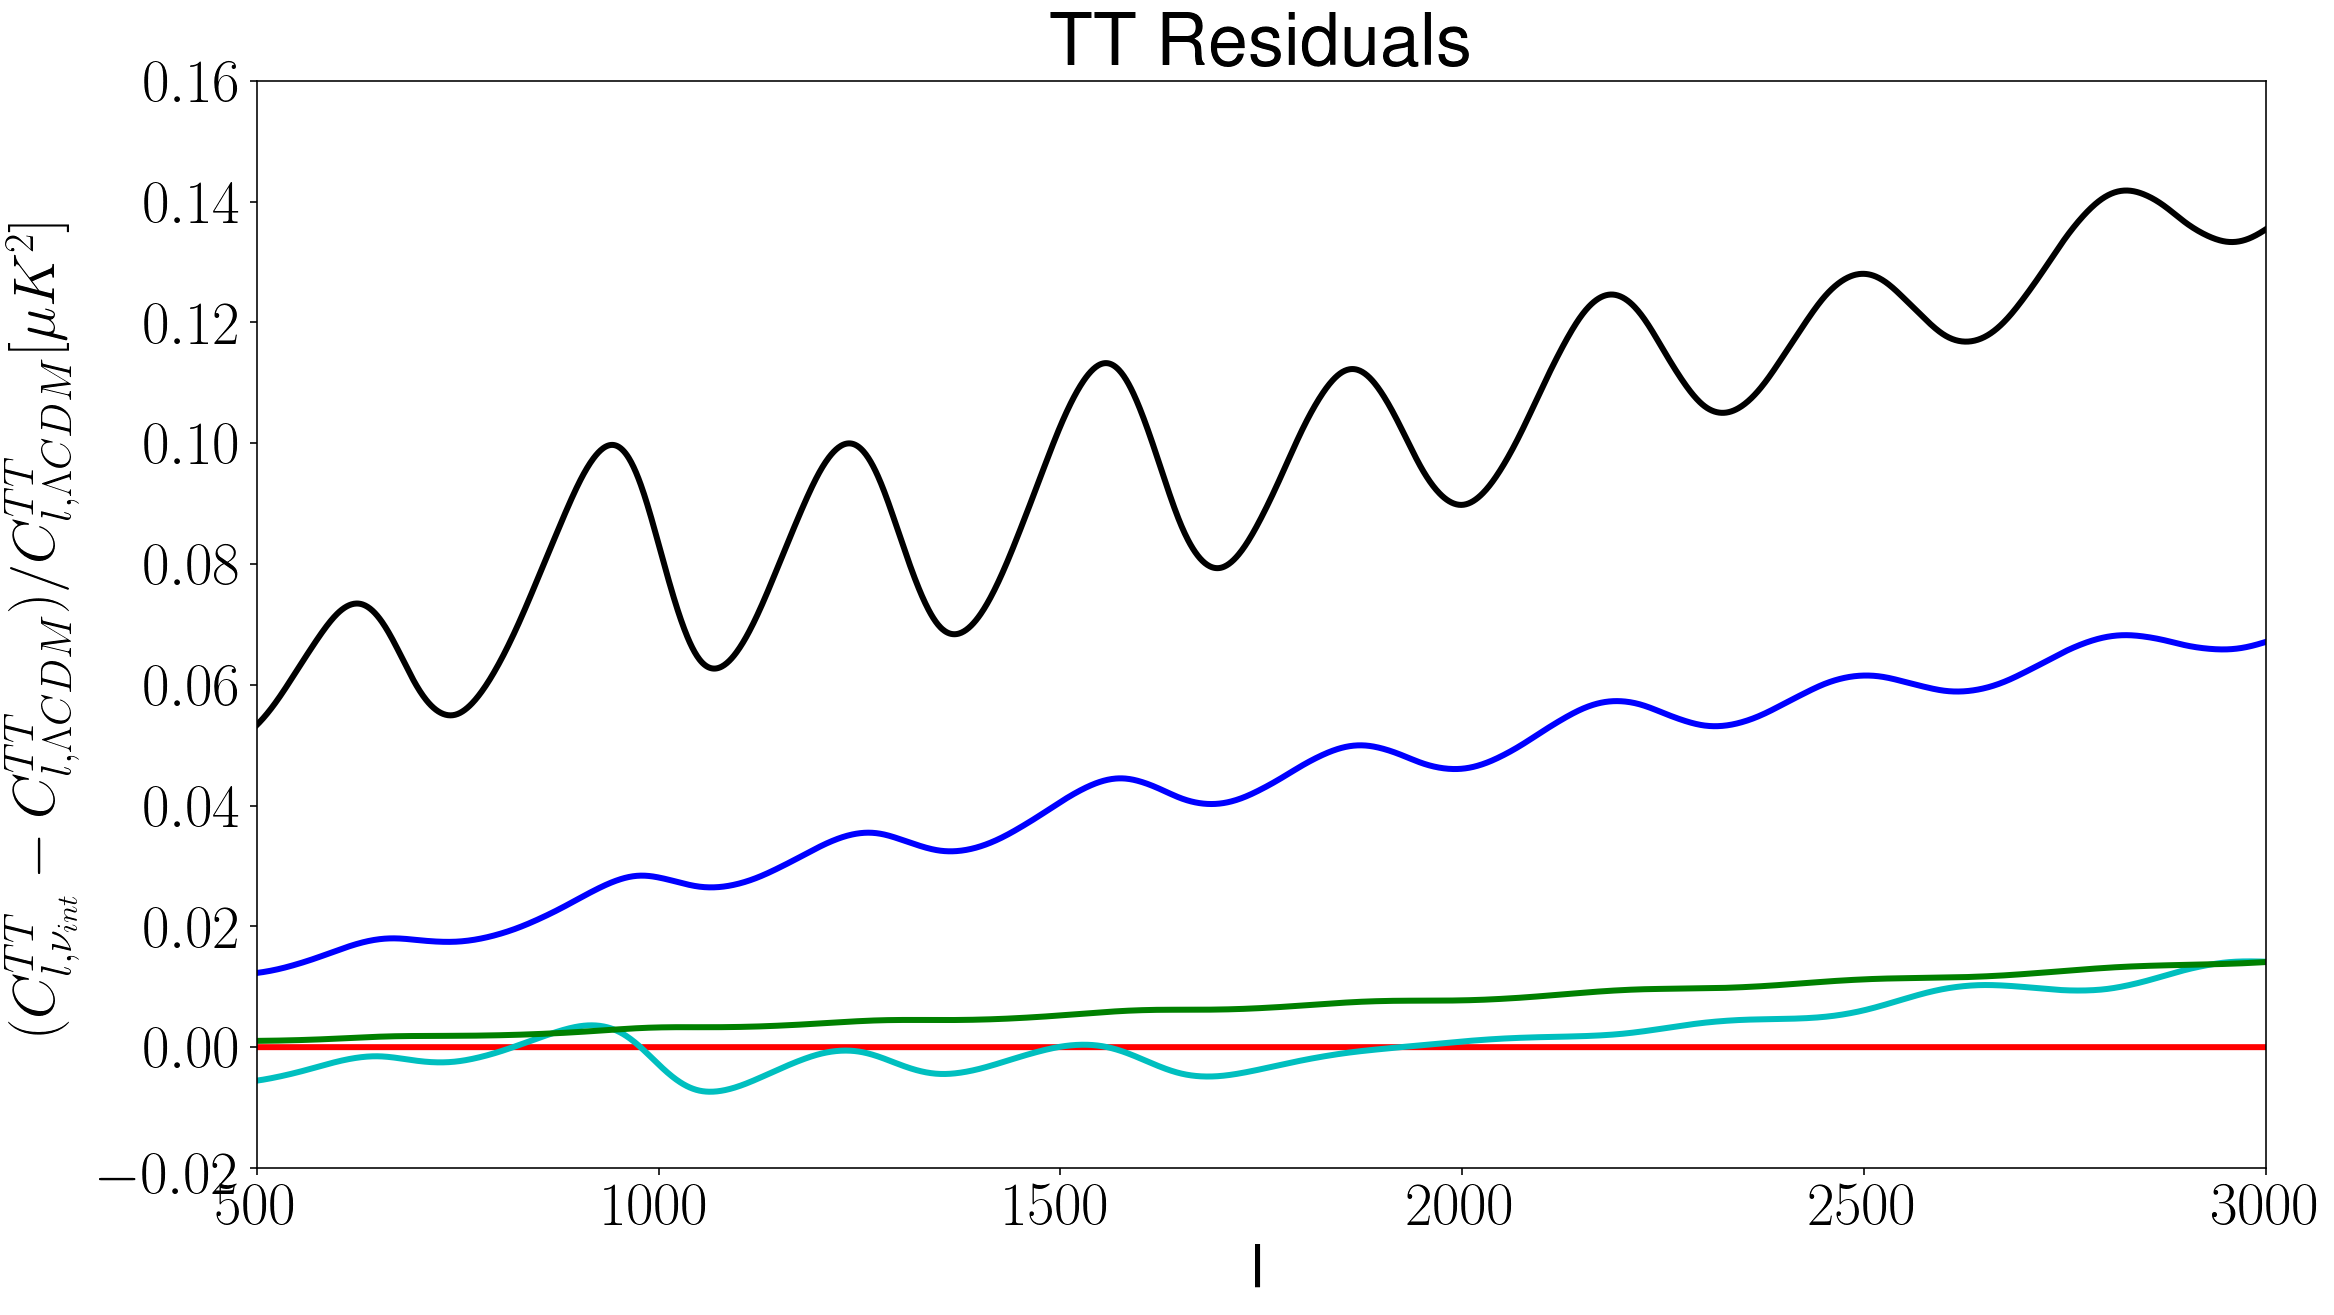

In [17]:
#plot the unlensed scalar CMB power spectra for different values of Gnu, multiplying by l^2 to compare with 1306.1536
ls = np.arange(totCL[0].shape[0])
plt.figure(figsize=(18, 10))
plt.xlim([500,3000]);
plt.ylim([-0.02,0.16]);
plt.plot(ls[2:],totCL[0][2:,0]-totCL[0][2:,0], color='r',linewidth=3)
plt.plot(ls[2:],(totCL[4][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='c',linewidth=3)
#plt.plot(ls[2:],(totCL[6][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='k',linewidth=3)
plt.plot(ls[2:],(totCL[1][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='k',linewidth=3)
plt.plot(ls[2:],(totCL[2][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='b',linewidth=3)
plt.plot(ls[2:],(totCL[3][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='g',linewidth=3)
plt.title('TT Residuals');
plt.xlabel("l")
plt.ylabel(r'$(C_{l, \nu_{int}}^{TT} - C_{l, \Lambda CDM}^{TT})/C_{l, \Lambda CDM}^{TT}[\mu K^2]$')
font = {'weight' : 'bold',
        'size'   : 24}
matplotlib.rc('font', **font)
#red_patch = mpatches.Patch(color='r', label=r'$\Lambda CDM$')
#black_patch = mpatches.Patch(color='k', label=r'$G_\nu = 10^{-2} MeV^{-2}$')
#blue_patch = mpatches.Patch(color='b', label=r'$G_\nu = 10^{-3} MeV^{-2}$')
#green_patch = mpatches.Patch(color='g', label=r'$G_\nu = 10^{-4} MeV^{-2}$')
#cyan_patch = mpatches.Patch(color='c', label=r'Interacting $\nu$ mode')
#plt.legend(handles=[black_patch,blue_patch,green_patch,cyan_patch,red_patch])
plt.savefig('Neutrinos_CMB_Residuals.jpg')

In [22]:
#Repeat the above plots for the 2018 data
#Choose self interaction values
Gnus = [0, 0.01, 0.001, 0.0001]
#Create list of power spectra
totCL = list()

In [23]:
#Loop through self-interaction values
for i in range(len(Gnus)):
    #Set up a new set of parameters for CAMB
    pars = camb.CAMBparams()
    #Set parameters to equal the standard mode in 1306.1536
    pars.set_cosmology(H0=68, ombh2=0.0224, omch2=0.120, tau=0.0534, Gnu = Gnus[i])
    pars.InitPower.set_params(As=2.09e-9, ns=0.964, r=0)
    pars.set_for_lmax(3000, lens_potential_accuracy=0);
    #calculate results for these parameters
    results = camb.get_results(pars)
    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    #calculate the power spectra
    #totCL.append(powers['total'])
    totCL.append(powers['lensed_scalar'])
    print(i, ": ", totCL[i])

0 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.03127004e+03  3.06717497e-02  1.67826040e-06  2.60923149e+00]
 ...
 [ 2.43249385e+01  7.94310686e-01  1.26564877e-02 -1.25223749e+00]
 [ 2.42690243e+01  7.92139434e-01  1.26400327e-02 -1.24509442e+00]
 [ 2.42129693e+01  7.90006242e-01  1.26235937e-02 -1.23799941e+00]]
1 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.03142195e+03  3.06725559e-02  1.90049366e-06  2.60929204e+00]
 ...
 [ 2.77511031e+01  9.13440618e-01  1.51218637e-02 -1.46937303e+00]
 [ 2.76906991e+01  9.10793971e-01  1.51021748e-02 -1.46153581e+00]
 [ 2.76301070e+01  9.08183676e-01  1.50825057e-02 -1.45372555e+00]]
2 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.03128795e+03  3.06720032e-02  

In [24]:
#Self-Interacting Neutrino Mode
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#Set parameters to equal the interacting mode in 1306.1536
pars.set_cosmology(H0=69.7, ombh2=0.0225, omch2=0.12, tau=0.0539, Gnu = 10**(-1.83))
pars.InitPower.set_params(As=1.974e-9, ns=0.94)
pars.set_for_lmax(3000, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
#calculate the power spectra
totCL.append(powers['lensed_scalar'])
print(totCL[-1])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11943186e+03  3.35778005e-02  1.70066581e-06  2.81684626e+00]
 ...
 [ 2.48262841e+01  8.09762704e-01  1.23790434e-02 -1.25003465e+00]
 [ 2.47675954e+01  8.07700914e-01  1.23623903e-02 -1.24276767e+00]
 [ 2.47087849e+01  8.05681054e-01  1.23457530e-02 -1.23556838e+00]]


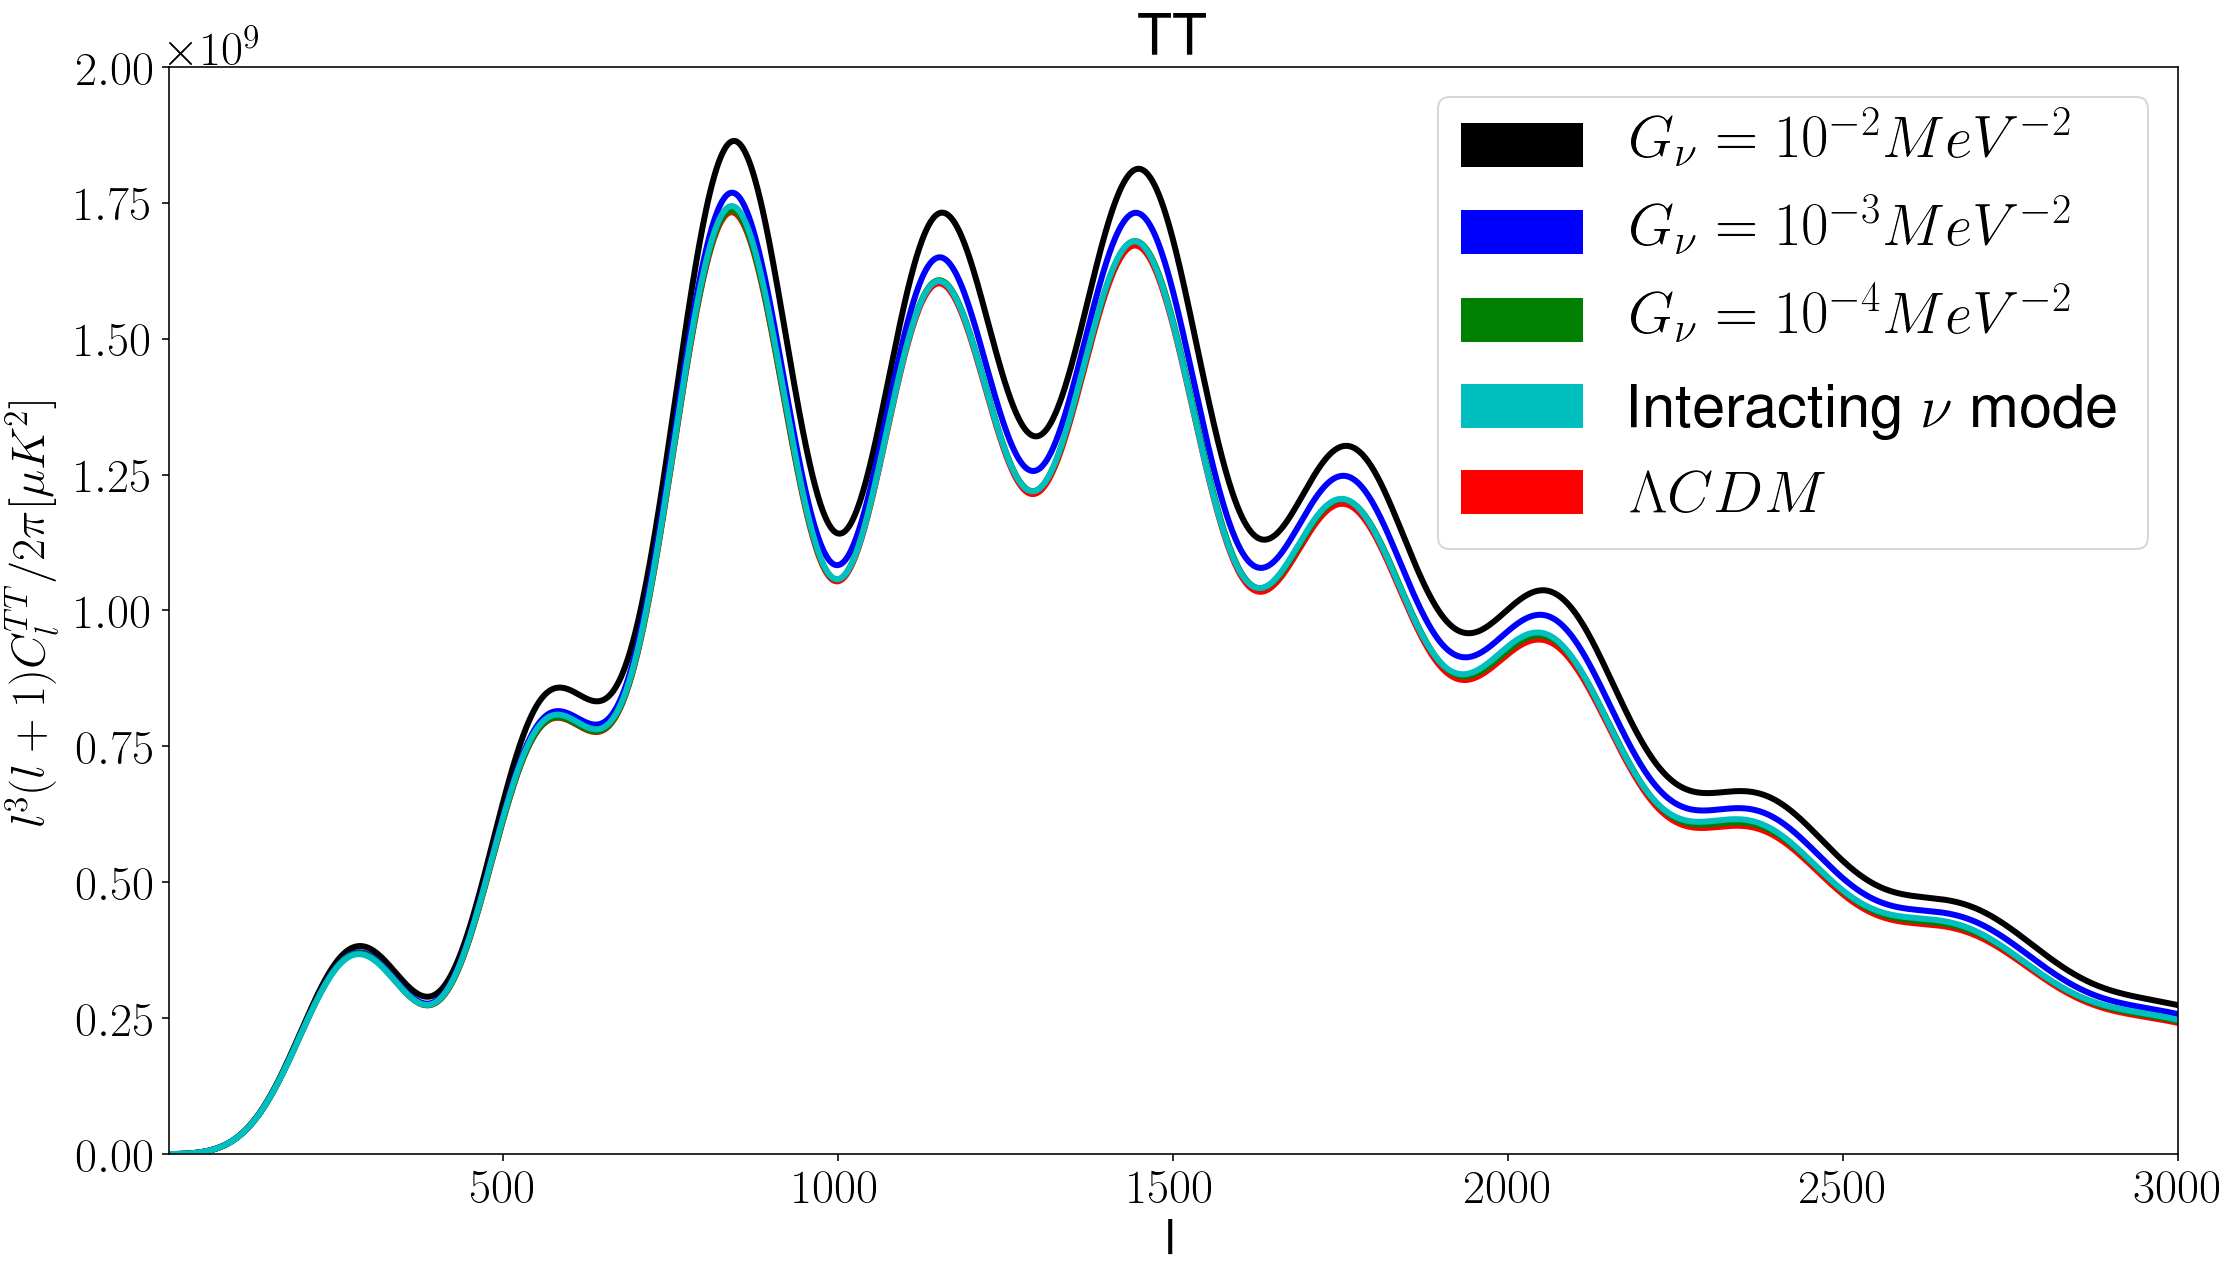

In [25]:
#plot the unlensed scalar CMB power spectra for different values of Gnu, multiplying by l^2 to compare with 1306.1536
ls = np.arange(totCL[0].shape[0])
plt.figure(figsize=(18, 10))
plt.plot(ls,ls*ls*totCL[0][:,0], color='r',linewidth=3)
plt.plot(ls,ls*ls*totCL[1][:,0], color='k',linewidth=3)
plt.plot(ls,ls*ls*totCL[2][:,0], color='b',linewidth=3)
plt.plot(ls,ls*ls*totCL[3][:,0], color='g',linewidth=3)
plt.plot(ls,ls*ls*totCL[-1][:,0], color='c',linewidth=3)
#plt.plot(ls,ls*ls*totCL[4][:,0], color='m',linewidth=3)
plt.title('TT');
plt.xlim([2,3000]);
plt.ylim([0e9,2e9]);
plt.xlabel("l")
plt.ylabel(r'$l^3(l + 1)C_l^{TT}/2\pi [\mu K^2]$')
font = {'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
red_patch = mpatches.Patch(color='r', label=r'$\Lambda CDM$')
black_patch = mpatches.Patch(color='k', label=r'$G_\nu = 10^{-2} MeV^{-2}$')
blue_patch = mpatches.Patch(color='b', label=r'$G_\nu = 10^{-3} MeV^{-2}$')
green_patch = mpatches.Patch(color='g', label=r'$G_\nu = 10^{-4} MeV^{-2}$')
cyan_patch = mpatches.Patch(color='c', label=r'Interacting $\nu$ mode')
plt.legend(handles=[black_patch,blue_patch,green_patch,cyan_patch,red_patch])
plt.savefig('Neutrinos2018_CMB.jpg')

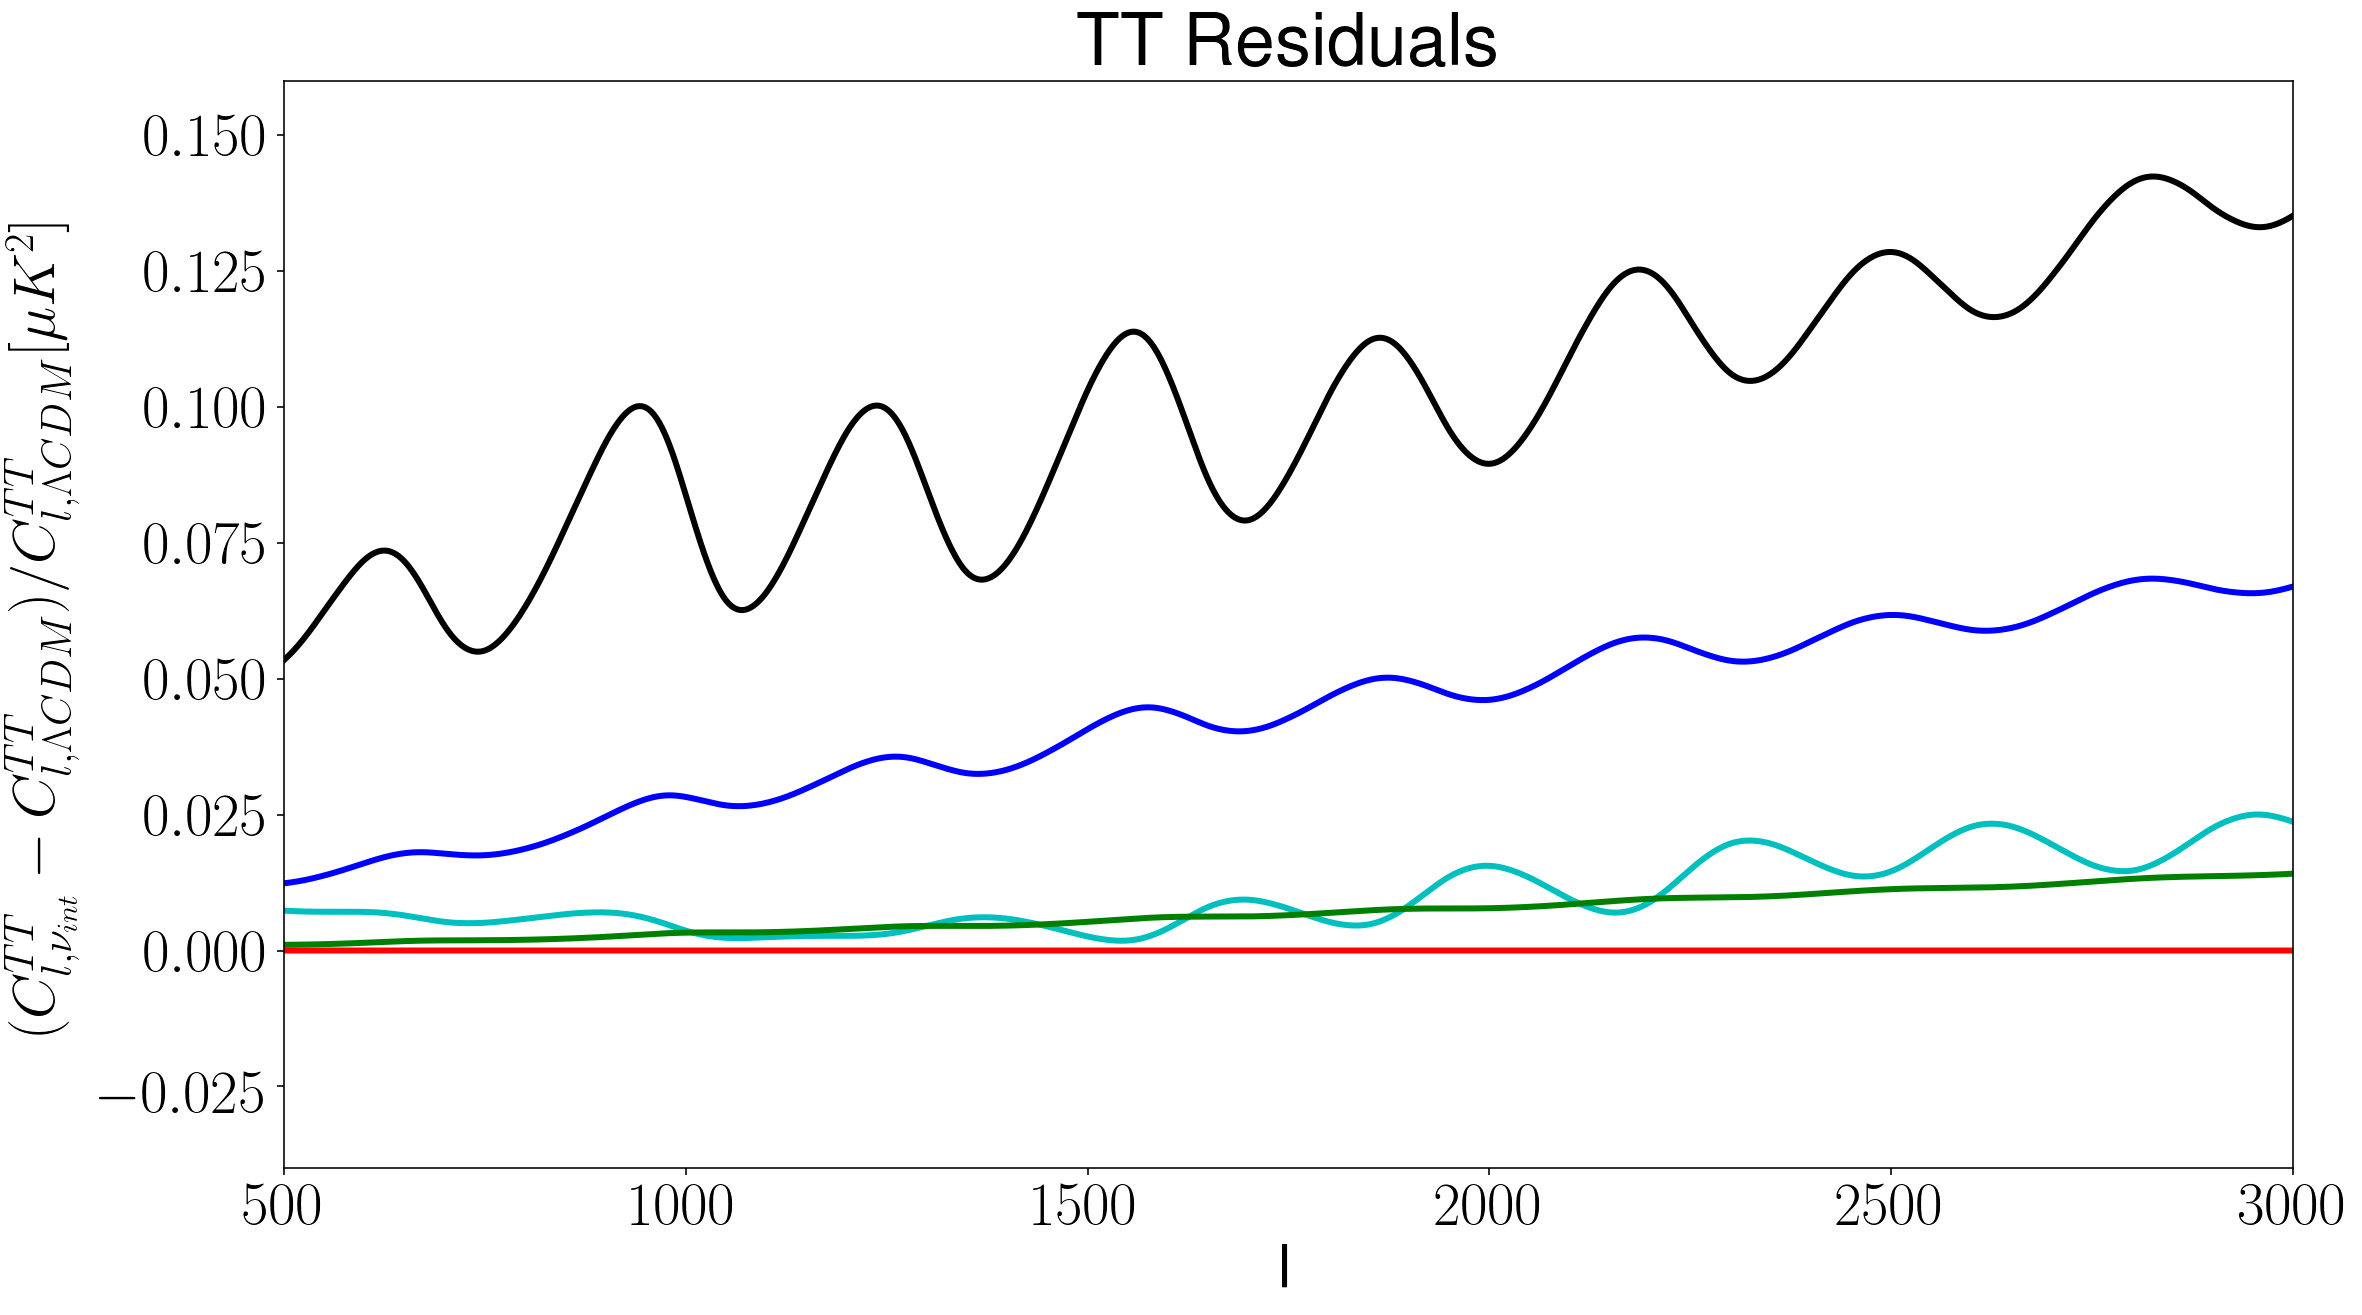

In [26]:
#plot the unlensed scalar CMB power spectra for different values of Gnu, multiplying by l^2 to compare with 1306.1536
ls = np.arange(totCL[0].shape[0])
plt.figure(figsize=(18, 10))
plt.xlim([500,3000]);
plt.ylim([-0.04,0.16]);
plt.plot(ls[2:],totCL[0][2:,0]-totCL[0][2:,0], color='r',linewidth=3)
plt.plot(ls[2:],(totCL[-1][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='c',linewidth=3)
#plt.plot(ls[2:],(totCL[-3][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='m',linewidth=3)
plt.plot(ls[2:],(totCL[1][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='k',linewidth=3)
plt.plot(ls[2:],(totCL[2][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='b',linewidth=3)
plt.plot(ls[2:],(totCL[3][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='g',linewidth=3)
plt.title('TT Residuals');
plt.xlabel("l")
plt.ylabel(r'$(C_{l, \nu_{int}}^{TT} - C_{l, \Lambda CDM}^{TT})/C_{l, \Lambda CDM}^{TT}[\mu K^2]$')
font = {'weight' : 'bold',
        'size'   : 24}
matplotlib.rc('font', **font)
#red_patch = mpatches.Patch(color='r', label=r'$\Lambda CDM$')
#black_patch = mpatches.Patch(color='k', label=r'$G_\nu = 10^{-2} MeV^{-2}$')
#blue_patch = mpatches.Patch(color='b', label=r'$G_\nu = 10^{-3} MeV^{-2}$')
#green_patch = mpatches.Patch(color='g', label=r'$G_\nu = 10^{-4} MeV^{-2}$')
#cyan_patch = mpatches.Patch(color='c', label=r'Interacting $\nu$ mode')
#plt.legend(handles=[black_patch,blue_patch,green_patch,cyan_patch,red_patch])
plt.savefig('Neutrinos2018_CMB_Residuals.jpg')

In [27]:
#Repeat the above plots for the 2018 data
#Choose self interaction values
Gnus = [0, 0.01, 0.001, 0.0001]
#Create list of power spectra
totCL = list()

In [28]:
#Loop through self-interaction values
for i in range(len(Gnus)):
    #Set up a new set of parameters for CAMB
    pars = camb.CAMBparams()
    #Set parameters to equal the standard mode in 1306.1536
    pars.set_cosmology(H0=67.476, ombh2=0.0224, omch2=0.120, tau=0.0534, Gnu = Gnus[i])
    pars.InitPower.set_params(As=2.09e-9, ns=0.964, r=0)
    pars.set_for_lmax(3000, lens_potential_accuracy=0);
    #calculate results for these parameters
    results = camb.get_results(pars)
    #get dictionary of CAMB power spectra
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    #calculate the power spectra
    #totCL.append(powers['total'])
    totCL.append(powers['lensed_scalar'])
    print(i, ": ", totCL[i])

0 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.02339586e+03  3.05803309e-02  1.68158564e-06  2.61637643e+00]
 ...
 [ 2.45954553e+01  8.05989451e-01  1.27831204e-02 -1.28851717e+00]
 [ 2.45403299e+01  8.03676053e-01  1.27665589e-02 -1.28130711e+00]
 [ 2.44850431e+01  8.01398404e-01  1.27500141e-02 -1.27413017e+00]]
1 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.02354404e+03  3.05811349e-02  1.90426358e-06  2.61643657e+00]
 ...
 [ 2.80471951e+01  9.27932777e-01  1.52758247e-02 -1.50984592e+00]
 [ 2.79877330e+01  9.25139838e-01  1.52560075e-02 -1.50201115e+00]
 [ 2.79280649e+01  9.22379704e-01  1.52362110e-02 -1.49418703e+00]]
2 :  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.02341339e+03  3.05805842e-02  

In [29]:
#Self-Interacting Neutrino Mode
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#Set parameters to equal the interacting mode in 1306.1536
pars.set_cosmology(H0=69.7, ombh2=0.0225, omch2=0.12, tau=0.0539, Gnu = 10**(-1.83))
pars.InitPower.set_params(As=1.974e-9, ns=0.94)
pars.set_for_lmax(3000, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
#calculate the power spectra
totCL.append(powers['lensed_scalar'])
print(totCL[-1])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11943186e+03  3.35778005e-02  1.70066581e-06  2.81684626e+00]
 ...
 [ 2.48262841e+01  8.09762704e-01  1.23790434e-02 -1.25003465e+00]
 [ 2.47675954e+01  8.07700914e-01  1.23623903e-02 -1.24276767e+00]
 [ 2.47087849e+01  8.05681054e-01  1.23457530e-02 -1.23556838e+00]]


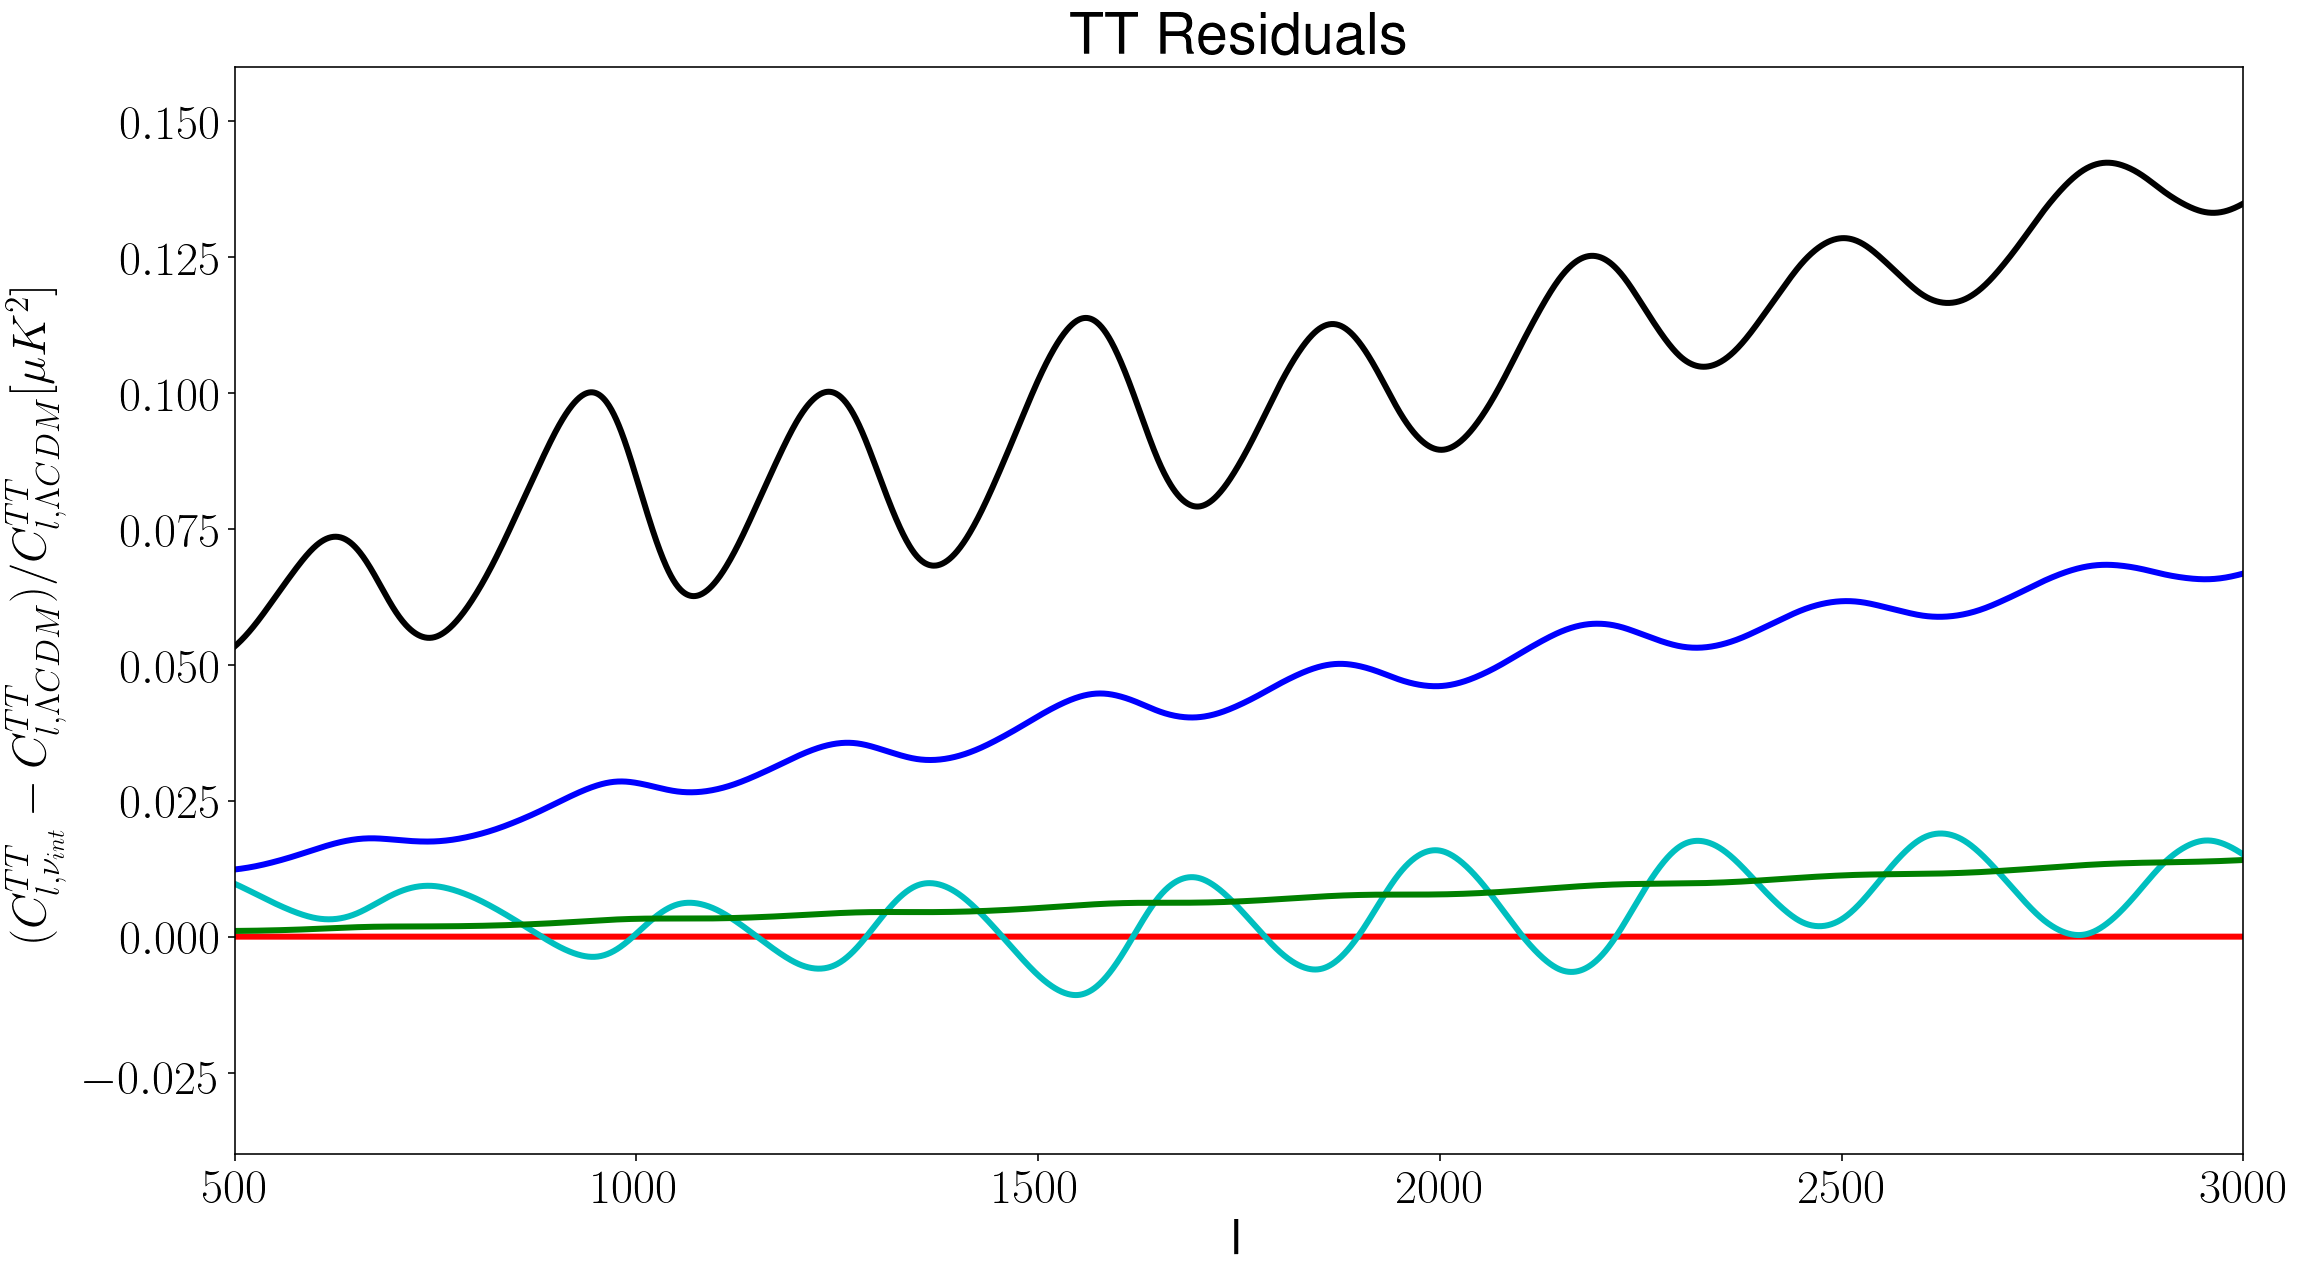

In [30]:
#plot the unlensed scalar CMB power spectra for different values of Gnu, multiplying by l^2 to compare with 1306.1536
ls = np.arange(totCL[0].shape[0])
plt.figure(figsize=(18, 10))
plt.xlim([500,3000]);
plt.ylim([-0.04,0.16]);
plt.plot(ls[2:],totCL[0][2:,0]-totCL[0][2:,0], color='r',linewidth=3)
plt.plot(ls[2:],(totCL[-1][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='c',linewidth=3)
#plt.plot(ls[2:],(totCL[-3][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='m',linewidth=3)
plt.plot(ls[2:],(totCL[1][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='k',linewidth=3)
plt.plot(ls[2:],(totCL[2][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='b',linewidth=3)
plt.plot(ls[2:],(totCL[3][2:,0]-totCL[0][2:,0])/totCL[0][2:,0], color='g',linewidth=3)
plt.title('TT Residuals');
plt.xlabel("l")
plt.ylabel(r'$(C_{l, \nu_{int}}^{TT} - C_{l, \Lambda CDM}^{TT})/C_{l, \Lambda CDM}^{TT}[\mu K^2]$')
font = {'weight' : 'bold',
        'size'   : 24}
matplotlib.rc('font', **font)
#red_patch = mpatches.Patch(color='r', label=r'$\Lambda CDM$')
#black_patch = mpatches.Patch(color='k', label=r'$G_\nu = 10^{-2} MeV^{-2}$')
#blue_patch = mpatches.Patch(color='b', label=r'$G_\nu = 10^{-3} MeV^{-2}$')
#green_patch = mpatches.Patch(color='g', label=r'$G_\nu = 10^{-4} MeV^{-2}$')
#cyan_patch = mpatches.Patch(color='c', label=r'Interacting $\nu$ mode')
#plt.legend(handles=[black_patch,blue_patch,green_patch,cyan_patch,red_patch])
plt.savefig('Neutrinos2018_CMB_Residuals_lowH0.jpg')